# ASTER for emissivity

In [2]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

import cryogrid_pytools as cg
from cryogrid_pytools import data, viz
from cryogrid_run_manager import templater, report

import xarray as xr
import xrspatial
import numpy as np

In [3]:
bbox = 72.471672,39.182082,72.740837,39.351133

config_url = 'https://docs.google.com/spreadsheets/d/1Ddwt0iciTTzASSlLO3_hmP1ILZmZ2KZInueQsh05ZlQ'

# fname_bbox, fname_config = templater.new_run(
#     bbox_WSEN=bbox, 
#     config_path_or_url=config_url, 
#     sampling=1,
#     id='sauksoy')

In [4]:
# fname_config = '../runs/abramov-test2/abramov-test2.xlsx'
# ds = xr.open_dataset('../runs/abramov-test2/forcing/geospatial_data.nc')

In [5]:
def make_report(run_name):
    
    fname_spatial = f'../runs/{run_name}/run_spatial_info.mat'
    fname_output = f'../runs/{run_name}/output/{run_name}_[0-9]+_201[5-9]0901.mat'
    dirname_run = f'../runs/{run_name}/'
    
    report.main.create_report(
        dirname_run,
        dirname_profiles=fname_output,
        fname_spatial=fname_spatial)

In [6]:
def save_image(ds, path='.', **savefig_props):
    import pathlib

    i = ds.index.item()
    path = pathlib.Path(path)
    path.mkdir(parents=True, exist_ok=True)
    sname = path / f"{i}.png"
    if sname.exists():
        return

    fig, axs, imgs = cg.viz.plot_profiles(ds)

    fig.savefig(sname, **savefig_props)
    plt.close('all')

In [78]:
import joblib

run_name = 'karadzhilga-7287w3901s7306e3920n-smpl1'
fname_config = f'../runs/{run_name}/{run_name}.xlsx'

fname = f'../runs/{run_name}/output/{run_name}-profiles.zarr/'
profiles = xr.open_zarr(fname, group='profiles')
spatial = xr.open_zarr(fname, group='spatial').compute()

func = joblib.delayed(save_image)
tasks = [func(profiles.isel(index=i), path=f'../runs/{run_name}/figures/profiles/') for i in range(profiles.index.size)]
out = joblib.Parallel(n_jobs=4, backend='loky', verbose=4)(tasks)

m, df = report.main.make_interactive_map_from_dataset(spatial, f'../runs/{run_name}/{run_name}.xlsx', profile_figure_path='profiles')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


2025-04-30 13:59:44.620 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:9 - Creating interactive map
2025-04-30 13:59:44.626 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:13 - Adding stratigraphy to map


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 178 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 196 out of 196 | elapsed:    3.7s finished
/Users/luke/Work/PAMIR/CryoGrid-run-manager/.venv/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:237: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


2025-04-30 13:59:45.290 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:23 - Adding altitude to map
2025-04-30 13:59:47.918 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:23 - Adding slope_angle to map
2025-04-30 13:59:50.494 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:23 - Adding aspect to map
2025-04-30 13:59:53.081 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:23 - Adding skyview_factor to map
2025-04-30 13:59:55.771 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:23 - Adding cluster_number_mapped to map
2025-04-30 13:59:58.266 | INFO     | cryogrid_run_manager.report.main:make_interactive_map_from_dataset:26 - Adding profile locations to map


In [71]:
Tavg2m = profiles.T.sel(depth=-1, method='nearest').mean('time').compute()

crs = cg.CryoGridConfigExcel(fname_config, 0, 0).get_dem().rio.crs
da = cg.spatial_clusters.map_gridcells_to_clusters(
    Tavg2m,
    spatial.cluster_centroid_index_mapped
).rio.write_crs(crs)

2025-04-30 13:51:50.744 | INFO     | cryogrid_pytools.excel_config:_get_root_path:70 - Found root path: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/karadzhilga-7287w3901s7306e3920n-smpl1
2025-04-30 13:51:50.855 | SUCCESS  | cryogrid_pytools.excel_config:__init__:37 - Loaded CryoGrid Excel configuration file: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/karadzhilga-7287w3901s7306e3920n-smpl1/karadzhilga-7287w3901s7306e3920n-smpl1.xlsx
2025-04-30 13:51:50.902 | INFO     | cryogrid_pytools.excel_config:__init__:52 - Start and end times: 1990-01-01 - 2024-01-01



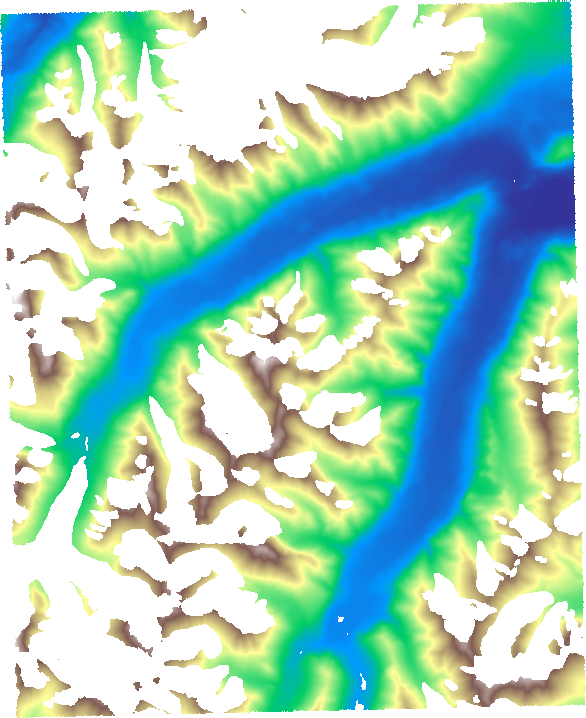
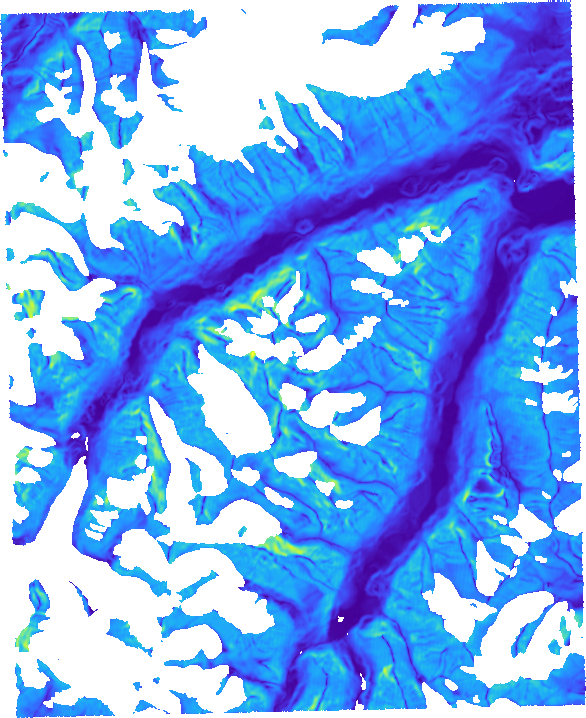
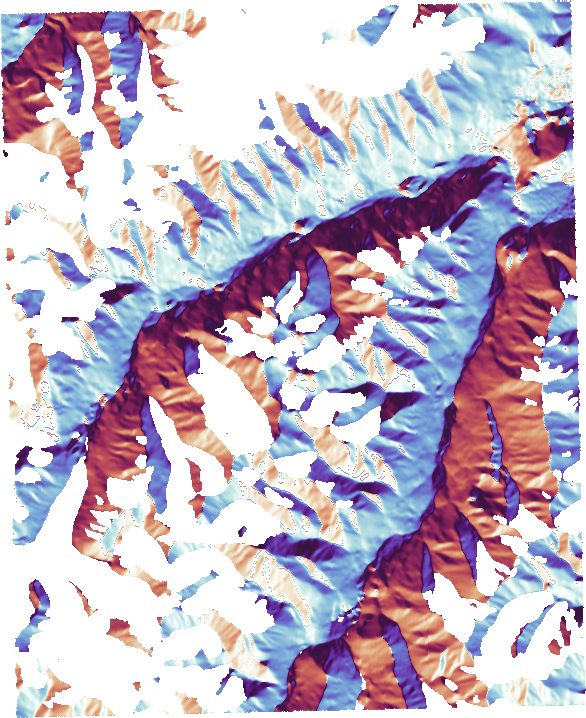
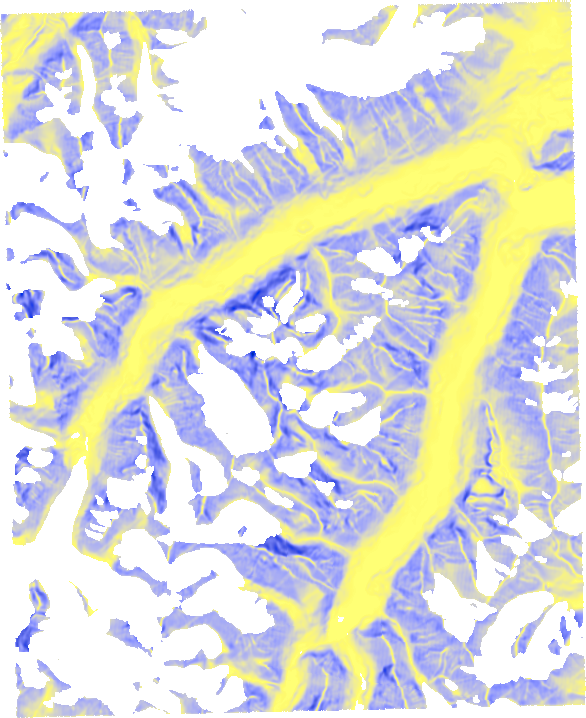
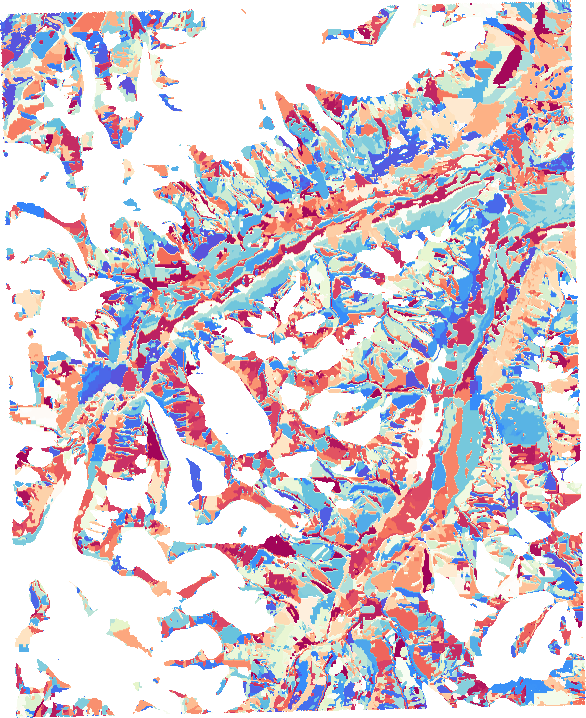
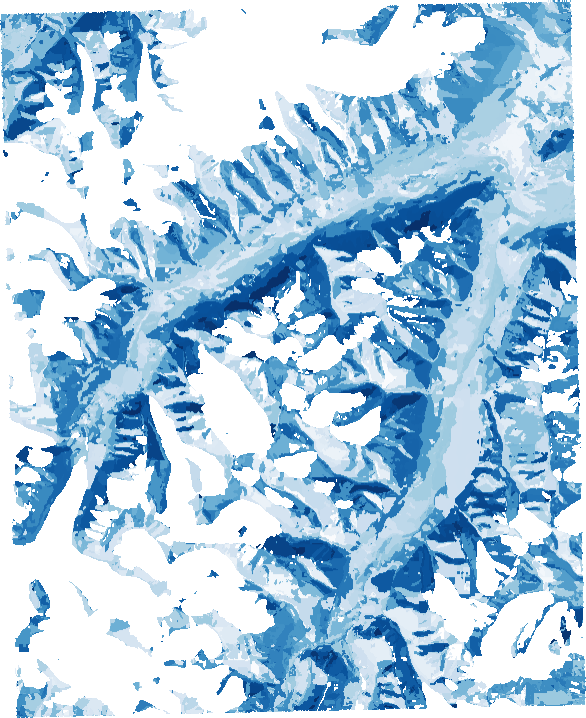

In [88]:
import folium
import copy

m_ = copy.deepcopy(m)
cg.viz.maps.plot_map(da=da.rename('2m temperature'), m=m_, cmap='Blues_r')
folium.LayerControl(collapsed=False).add_to(m_)
m_

In [1]:
run_name = "kaindy-7234w3899s7265e3913n-smpl1"
fname_spatial = f'../runs/{run_name}/run_spatial_info.mat'
fname_output = f'../runs/{run_name}/output/{run_name}_[0-9]+_201[5-9]0901.mat'
dirname_run = f'../runs/{run_name}/'
report.main.create_report(
    dirname_run,
    dirname_profiles=fname_output,
    fname_spatial=fname_spatial,
)

NameError: name 'report' is not defined

In [16]:
ds_profiles = cg.read_OUT_regridded_files(fname_output, deepest_point=-20)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 985 out of 985 | elapsed:   11.3s finished


2025-04-17 18:47:15.479 | INFO     | cryogrid_pytools.outputs:read_OUT_regridded_files:233 - Depths are the same for all gridcells. Setting depth as the dimension.


In [19]:
ds_spatial = cg.spatial_clusters.read_spatial_data(fname_spatial)

In [65]:
temp = ds_profiles.T

In [93]:
from tqdm.dask import TqdmCallback as ProgressBar

with ProgressBar():
        
    active_layer_depth = (
        temp
        .groupby('index')
        .apply(cg.analyze.detect_active_layer)
        .max('year')
        .idxmax('depth')
        .where(lambda x: x > -19)
        .fillna(0)
        .compute()
    )

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/22458 [00:00<?, ?it/s]

In [94]:
t05m = ds_profiles.T.sel(depth=-0.1, method='nearest').mean('time').compute()
t2m = ds_profiles.T.sel(depth=-2).mean('time').compute()

In [103]:
out = cg.spatial_clusters.map_gridcells_to_clusters(
    -active_layer_depth, 
    ds_spatial.cluster_centroid_index_mapped.compute(),
)

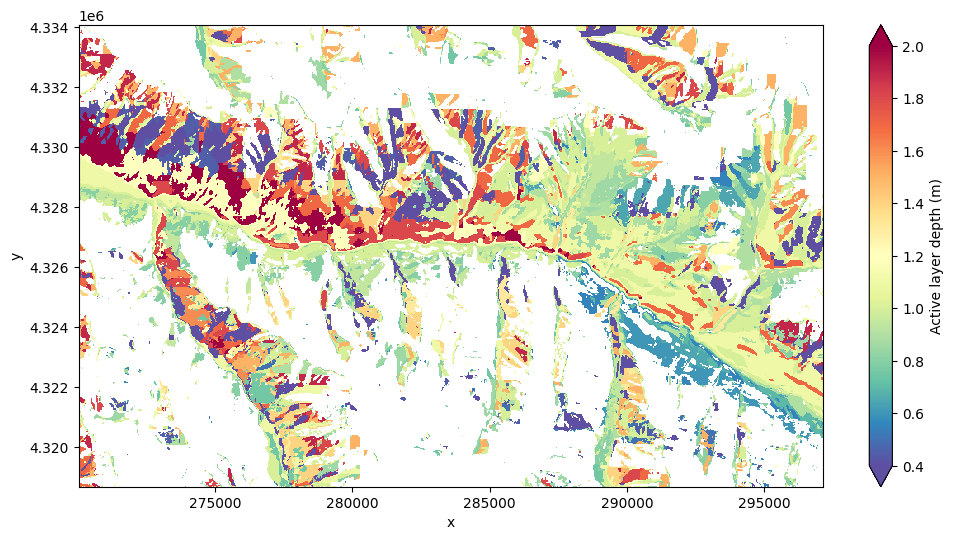

In [107]:
img = out.plot.imshow(cmap='Spectral_r', robust=True, size=6, aspect=2)
img.colorbar.set_label('Active layer depth (m)')

In [25]:
ds = xr.open_dataset('../runs/kaindy-7234w3899s7265e3913n-smpl0/forcing/geospatial_data.nc').set_coords('spatial_ref')

In [2]:
# fname_profiles = '../runs/abramov-test0/output/profiles_mat/abramov-test0_[0-9]+_1961[0-9]{4}.mat'
# profile_num = cg.read_OUT_regridded_files(fname_profiles, deepest_point=-20).gridcell.values
ds_spatial = cg.spatial_clusters.read_spatial_data('../runs/abramov-test0/run_spatial_info.mat')

In [ ]:
def get_profile_indexes(profiles_directory, fname_excel_config):
    
    config = cg.CryoGridConfigExcel(fname_excel_config, False, False)
    start, _ = config.get_start_end_times()
    year1 = start.year + 1

    fname_profiles = f'{profiles_directory.rstrip('/')}/.*_[0-9]+_{year1}[0-9]{{4}}.mat'

    ds_profiles = cg.read_OUT_regridded_files(fname_profiles)

    indexes = ds_profiles.index.values
    
    return indexes


def get_out_time(fname_excel_config):
    config = cg.CryoGridConfigExcel(fname_excel_config, False, False)
    start, end = config.get_start_end_times()

    return config, start, end


In [78]:
def get_run_indexes_from_fnames(profiles_directory, pattern=r".*_([0-9]+)_[0-9]{8}.mat"):
    """
    Get the indexes of the profiles in the output directory.
    """
    import pathlib
    import re

    profiles_directory = pathlib.Path(profiles_directory)
    # list all files in the directory
    flist = profiles_directory.glob('*.mat')
    
    indexes = []
    for file in flist:
        # get the file name
        fname = file.name
        matches = re.findall(pattern, fname)
        if matches:
            idx = int(matches[0])
            if idx not in indexes:
                indexes.append(idx)
    
    # sort the indexes
    indexes.sort()
    return indexes


def get_depth_from_config(config_fname, out_class_name='OUT_regridded'):
    
    config = cg.CryoGridConfigExcel(config_fname, False, False)
    info = config.get_class(out_class_name).iloc[:, 0]
    
    upper = +float(info.upper_elevation)
    lower = -float(info.lower_elevation)
    step  = -float(info.target_grid_size)
    
    depth = np.arange(upper, lower + step/2, step)

    return depth


def is_coord_already_in_zarr(fname_zarr, zarr_kwargs={}, **coord_value):
    import pathlib

    if len(coord_value) == 0:
        raise ValueError('No coordinate values provided')
    if len(coord_value) > 1:
        raise ValueError('Only one coordinate value allowed')
    
    fname_zarr = pathlib.Path(fname_zarr)

    if not fname_zarr.exists():
        return False

    # open the zarr file
    ds = xr.open_zarr(fname_zarr, **zarr_kwargs)
    dim = list(coord_value.keys())[0]
    values = coord_value[dim]

    if dim not in ds.dims:
        raise ValueError(f'Dimension {dim} not found in zarr file')
    
    # check that all items in values are in the dimension
    if np.isin(values, ds[dim].values).all():
        ds.close()
        return True
    else:
        ds.close()
        return False
    

def save_profiles_to_zarr(fname_zarr, fname_profiles, fname_spatial, excel_config, fname_forcing=None, time=None):
    from loguru import logger
    import pathlib

    profile_indexes = get_run_indexes_from_fnames(pathlib.Path(fname_profiles).parent)
    depths = get_depth_from_config(excel_config)

    n = len(profile_indexes)
    logger.info(f'Saving {n} profiles to {fname_zarr}')

    for c, i in enumerate(profile_indexes):
        if is_coord_already_in_zarr(fname_zarr, index=i, zarr_kwargs={'group': 'profiles'}):
            continue
        else:
            logger.info(f'[{c:03d}/{n:03d}] Saving {i} to {fname_zarr}')
        
        ds_prof = (
            cg.read_OUT_regridded_files(fname_profiles.format(i=i), deepest_point=depths.min(), verbose=False)
            .compute()
            .drop_duplicates(dim='time', keep='first')
            .assign_coords(depth=depths)
            .reindex(time=time)
            .chunk({'time': -1, 'depth': -1, 'index':1})
            .assign(elevation=lambda x: x.elevation.sel(depth=0, method='nearest')))

        if pathlib.Path(fname_zarr).exists():
            kwargs = {'append_dim': 'index'}
        else:
            kwargs = {'mode': 'w'}

        ds_prof.to_zarr(fname_zarr, group='profiles', **kwargs)

    ds_spatial = cg.spatial_clusters.read_spatial_data(fname_spatial).rename(elevation='altitude')
    ds_spatial.to_zarr(fname_zarr, group='spatial', mode='a-')

    if fname_forcing is not None:
        ds_forcing = cg.forcing.read_mat_ear5(fname_forcing).astype('float32').chunk()
        ds_forcing.attrs['source'] = str(fname_forcing)
        ds_forcing.to_zarr(fname_zarr, group='forcing', mode='a-')

In [ ]:
run_name = "sauksoy-7247w3918s7274e3935n-smpl1"

fname_zarr = f'../runs/{run_name}/output/{run_name}-profiles.zarr'
fname_profiles = f'../runs/{run_name}/output/{run_name}_{{i}}_[0-9]{{{{8}}}}.mat'
fname_config = f'../runs/{run_name}/{run_name}.xlsx'
fname_spatial = f'../runs/{run_name}/run_spatial_info.mat'
fname_forcing = f'../runs/{run_name}/forcing/era5.mat'

config, _, t1 = get_out_time(fname_config)
time = xr.date_range('2000-01-01', t1, freq='6h', inclusive='left')

2025-04-28 10:54:47.288 | INFO     | cryogrid_pytools.excel_config:_get_root_path:70 - Found root path: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/sauksoy-7247w3918s7274e3935n-smpl1
2025-04-28 10:54:47.351 | SUCCESS  | cryogrid_pytools.excel_config:__init__:37 - Loaded CryoGrid Excel configuration file: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/sauksoy-7247w3918s7274e3935n-smpl1/sauksoy-7247w3918s7274e3935n-smpl1.xlsx
2025-04-28 10:54:47.381 | INFO     | cryogrid_pytools.excel_config:__init__:52 - Start and end times: 1990-01-01 - 2024-01-01


In [77]:
save_profiles_to_zarr(
    fname_zarr,
    fname_profiles,
    fname_spatial,
    fname_config,
    time=time,
    fname_forcing=fname_forcing)

2025-04-28 10:54:47.998 | INFO     | cryogrid_pytools.excel_config:_get_root_path:70 - Found root path: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/sauksoy-7247w3918s7274e3935n-smpl1
2025-04-28 10:54:48.060 | SUCCESS  | cryogrid_pytools.excel_config:__init__:37 - Loaded CryoGrid Excel configuration file: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/sauksoy-7247w3918s7274e3935n-smpl1/sauksoy-7247w3918s7274e3935n-smpl1.xlsx
2025-04-28 10:54:48.089 | INFO     | cryogrid_pytools.excel_config:__init__:52 - Start and end times: 1990-01-01 - 2024-01-01
2025-04-28 10:54:48.091 | INFO     | __main__:save_profiles_to_zarr:9 - Saving 150 profiles to ../runs/sauksoy-7247w3918s7274e3935n-smpl1/output/sauksoy-7247w3918s7274e3935n-smpl1-profiles.zarr
2025-04-28 10:54:48.092 | INFO     | __main__:save_profiles_to_zarr:15 - [000/150] Saving 3521 to ../runs/sauksoy-7247w3918s7274e3935n-smpl1/output/sauksoy-7247w3918s7274e3935n-smpl1-profiles.zarr
2025-04-28 10:54:48.453 | INFO     | cryogrid_py

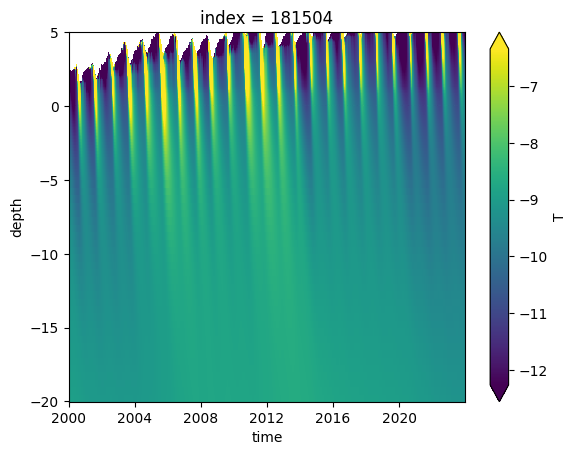

In [69]:
url = fname_zarr

ds = xr.open_zarr(url, group='profiles')
ds.T[105].plot.imshow(robust=True)

In [4]:
from tqdm.dask import TqdmCallback as ProgressBar

with ProgressBar():
    ds = xr.open_mfdataset(
        '../runs/abramov-test0/output/profiles_nc/abramov-test0_*.nc', 
        combine='by_coords',
        coords='all',
        engine='h5netcdf',
        parallel=True,
        chunks={'time': 365.25 * 4, 'gridcell': 1, 'depth': -1},
        preprocess=lambda x: x.drop_duplicates(dim='time', keep='first').assign_coords(depth=np.linspace(5, -20, 501)).chunk({'time': -1, 'depth': 501, 'gridcell':1}),
    )

  0%|          | 0/375 [00:00<?, ?it/s]

In [7]:
with ProgressBar():
    ds.to_zarr(
        '../runs/abramov-test0/output/abramov-test0_profiles.zarr', 
    )

  0%|          | 0/83300 [00:00<?, ?it/s]

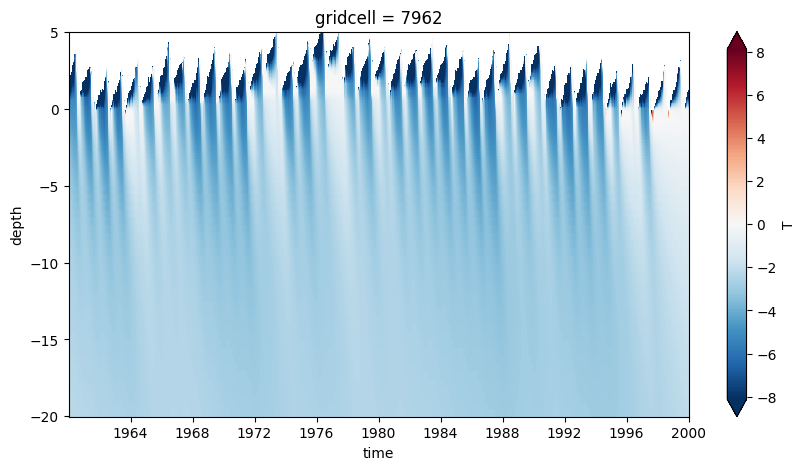

In [22]:
xr.open_zarr('../runs/abramov-test0/output/abramov-test0_profiles.zarr').T[-3].plot.imshow(robust=True, size=5, aspect=2, center=0)

In [8]:
report.main.create_report(
    dirname_experiment='../runs/abramov-test0/',
    dirname_profiles='../runs/abramov-test0/output/',
)

2025-04-15 21:32:35.480 | INFO     | cryogrid_run_manager.report.main:create_report:21 - Deepest point: 20
2025-04-15 21:32:35.514 | INFO     | cryogrid_run_manager.report.main:make_interactive_map:84 - Reading spatial data: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/abramov-test0/run_spatial_info.mat
2025-04-15 21:32:35.529 | INFO     | cryogrid_run_manager.report.main:make_interactive_map:87 - Creating interactive map
2025-04-15 21:32:35.547 | INFO     | cryogrid_run_manager.report.main:make_interactive_map:93 - Adding stratigraphy to map
2025-04-15 21:32:35.676 | INFO     | cryogrid_run_manager.report.main:make_interactive_map:111 - Adding elevation to map
2025-04-15 21:32:35.818 | INFO     | cryogrid_run_manager.report.main:make_interactive_map:111 - Adding slope_angle to map
2025-04-15 21:32:35.958 | INFO     | cryogrid_run_manager.report.main:make_interactive_map:111 - Adding aspect to map
2025-04-15 21:32:36.098 | INFO     | cryogrid_run_manager.report.main:make_interactiv

# Clusters

In [31]:
slope = xrspatial.slope(ds.elevation).ffill(dim='y').bfill(dim='y').ffill(dim='x').bfill(dim='x')
aspect = xrspatial.aspect(ds.elevation).ffill(dim='y').bfill(dim='y').ffill(dim='x').bfill(dim='x')
aspect_sin = np.sin(np.deg2rad(aspect))
aspect_cos = np.cos(np.deg2rad(aspect))

In [38]:
config = cg.CryoGridConfigExcel(fname_config)

2025-04-11 14:25:37.547 | INFO     | cryogrid_pytools.excel_config:_get_root_path:70 - Found root path: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/abramov-test2
2025-04-11 14:25:37.606 | SUCCESS  | cryogrid_pytools.excel_config:__init__:37 - Loaded CryoGrid Excel configuration file: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/abramov-test2/abramov-test2.xlsx
2025-04-11 14:25:37.652 | INFO     | cryogrid_pytools.excel_config:check_files_exist:505 - Checking file locations...
2025-04-11 14:25:37.653 | SUCCESS  | cryogrid_pytools.excel_config:check_files_exist:510 - Located file: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/abramov-test2/forcing/albedo.tif
2025-04-11 14:25:37.653 | SUCCESS  | cryogrid_pytools.excel_config:check_files_exist:510 - Located file: /Users/luke/Work/PAMIR/CryoGrid-run-manager/runs/abramov-test2/forcing/snow_index.tif
2025-04-11 14:25:37.653 | SUCCESS  | cryogrid_pytools.excel_config:check_files_exist:510 - Located file: /Users/luke/Work/PAMIR/Cryo

In [ ]:
def def_make_cluster_vars(ds):

    def fill_edges(da):
        """Fill edges of a DataArray with nearest values."""
        # Fill edges in y direction
        da = da.ffill(dim='y').bfill(dim='y')
        # Fill edges in x direction
        da = da.ffill(dim='x').bfill(dim='x')
        return da

    has_slope_aspect = 'CLUSTER_SLOPE_ASPECT' in list(config.get_classes().values())
    has_raw_variables = 'CLUSTER_RAW_VARIABLES' in list(config.get_classes().values())

    cluster_variables = []
    if has_raw_variables:
        for key in config.get_class('CLUSTER_RAW_VARIABLES').iloc[0, 0]:
            if key == 'altitude':
                key = 'elevation'
            cluster_variables += ds[key],

    if has_slope_aspect:
        cluster_variables += xrspatial.slope(ds.elevation).pipe(fill_edges),
        aspect = xrspatial.aspect(ds.elevation).pipe(fill_edges)
        cluster_variables += np.cos(np.deg2rad(aspect)).pipe(fill_edges).rename('aspect_cos'),
        cluster_variables += np.sin(np.deg2rad(aspect)).pipe(fill_edges).rename('aspect_sin'),

    cluster_variables = xr.merge(cluster_variables)

    mask = ds.stratigraphy_index > 0

    cluster_variables = cluster_variables.where(mask)

In [128]:
from sklearn import (
    cluster, 
    metrics,
    pipeline,
    preprocessing,
    model_selection,
)
from cryogrid_run_manager.templater.clustering import FaissKMeans

In [266]:
df = cluster_variables.to_dataframe().dropna()
X = df.pipe(preprocessing.scale)
X = pd.DataFrame(X, columns=df.columns, index=df.index)

/Users/luke/Work/PAMIR/CryoGrid-run-manager/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/luke/Work/PAMIR/CryoGrid-run-manager/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


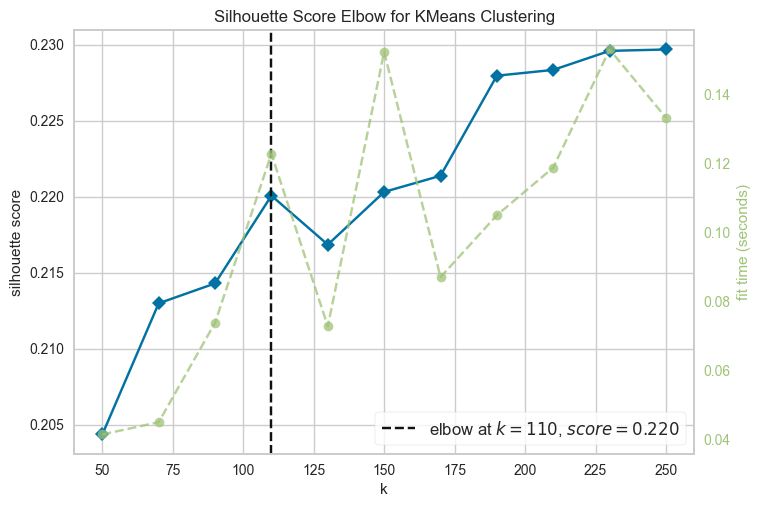

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [275]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, KElbow

n_clusters_list = np.arange(50, 251, 20)

# Instantiate the clustering model and visualizer
km = KMeans(random_state=23)
visualizer = KElbowVisualizer(km, k=n_clusters_list, metric='silhouette')
 
visualizer.fit(X.sample(frac=0.7))        # Fit the data to the visualizer
visualizer.show()

In [280]:
import joblib
from sklearn.cluster import MiniBatchKMeans
from collections import defaultdict

n_clusters_list = np.r_[np.arange(50, 251, 20)]

def get_kmeans_sillhoutte(X, k):
    """Get KMeans silhouette score for a given number of clusters."""
    kmeans = MiniBatchKMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    return metrics.silhouette_score(X, labels)

models = []
scores = defaultdict(list)
for k in n_clusters_list:
    print(k)
    # do multiple runs to get a better estimate of the score
    func = joblib.delayed(get_kmeans_sillhoutte)
    scores[k] += joblib.Parallel(n_jobs=4)(
        func(X, k) for _ in range(20)
    )

50
70
90
110
130
150
170
190
210
230
250


In [281]:
scores = pd.DataFrame(dict(scores)).T

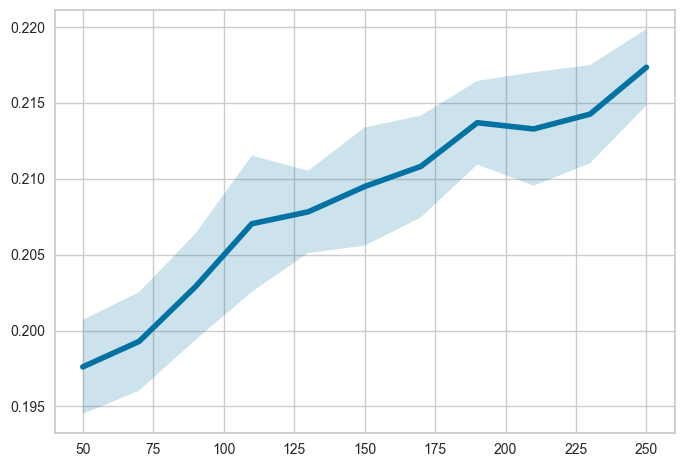

In [282]:
avg = scores.mean(axis=1)
std = scores.std(axis=1)

plt.fill_between(avg.index, avg - std, avg + std, alpha=0.2)
plt.plot(avg.index, avg, label='Silhouette score', lw=4)

In [4]:
from yellowbrick import cluster
from tqdm.dask import TqdmCallback

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


2025-04-15 09:52:22.046 | INFO     | cryogrid_pytools.outputs:read_OUT_regridded_files:230 - Depths are the same for all gridcells. Setting depth as the dimension.


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished


  0%|          | 0/322 [00:00<?, ?it/s]

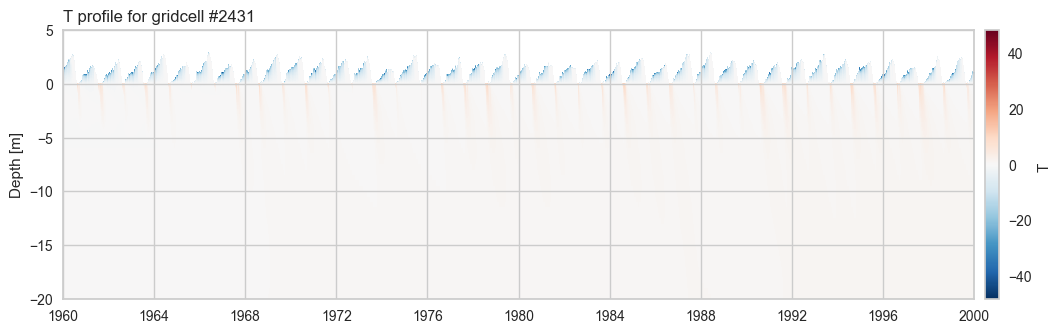

In [19]:
profile = cg.read_OUT_regridded_files('../runs/abramov-test0/output/abramov-test0_2431_*.mat', deepest_point=-20)

with TqdmCallback():
    profile.load()

viz.plot_profile(profile.T.resample(time='5D').mean(), robust=False)